In [1]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import platform

In [2]:
def Plot(x_plot: list, y_plot: list, name: str, iterations: int):  #General plot function
    plt.plot(x_plot ,y_plot)
    #plt.xticks(np.arange(0, iterations, iterations/10))
    #plt.yticks(np.arange(0, max(y_plot), iterations/10))
    plt.xlabel('iterations')
    plt.ylabel(name)
    plt.title(name + 'per epoch')
    plt.show()

In [3]:
#Compiling C code
if(platform.system() == "Linux"):
    ! make
else:
    ! gcc -c genetic.c
    ! gcc -c main.c
    ! gcc -o main main.o genetic.o -lm

In [4]:
#Running C code
! ./main

In [5]:
#Getting sysout data
with open("Results.txt",'r') as File:
    lines = File.readlines()

    for line in lines:
        if line.find("EPOCHS") != -1:
            x=line.split()
            for i in x:
                if i.isnumeric():
                    EPOCHS = int(i)
            break
File.close()

with open("data.txt",'r') as dataFile:
    data = [line.rstrip('\n').split(" ") for line in dataFile]
dataFile.close()

#Passing data to arrays and converting to np.arrays
y_best = []
y_worst = []
y_average = []
x = []

for lines in range(EPOCHS):
    y_best.append(data[lines][0])
    y_average.append(data[lines][1])
    y_worst.append(data[lines][2])
    x.append(data[lines][3])

y_best = np.array(y_best, dtype=float)
y_average = np.array(y_average, dtype=float)
y_worst = np.array(y_worst, dtype=float)
x = np.array(x, dtype=int)

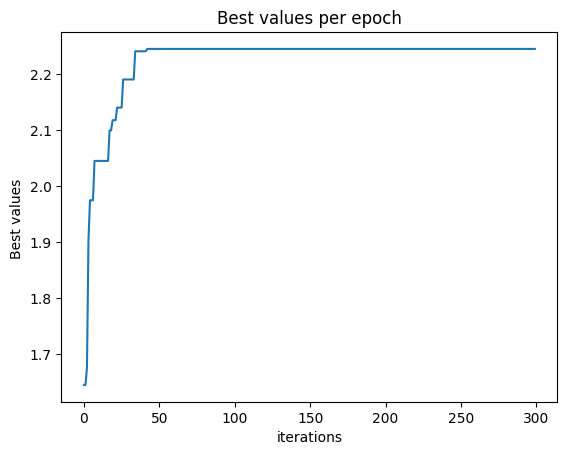

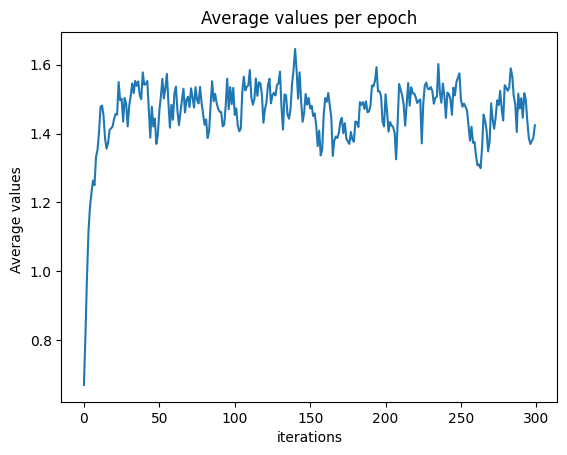

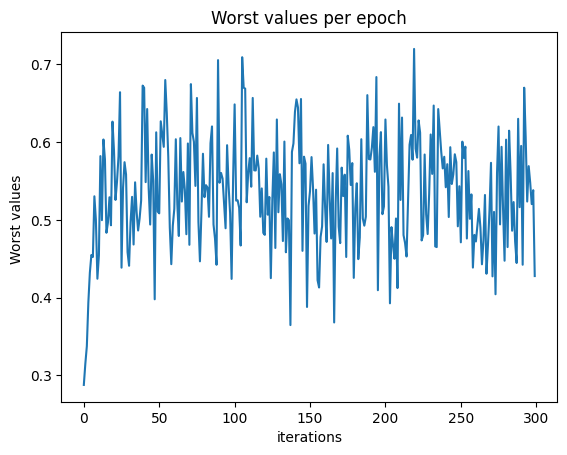

In [6]:
#Plotting graphs
Plot(x, y_best, "Best values ", EPOCHS)
print('\n')
Plot(x, y_average, "Average values ", EPOCHS)
print('\n')
Plot(x, y_worst, "Worst values ", EPOCHS)

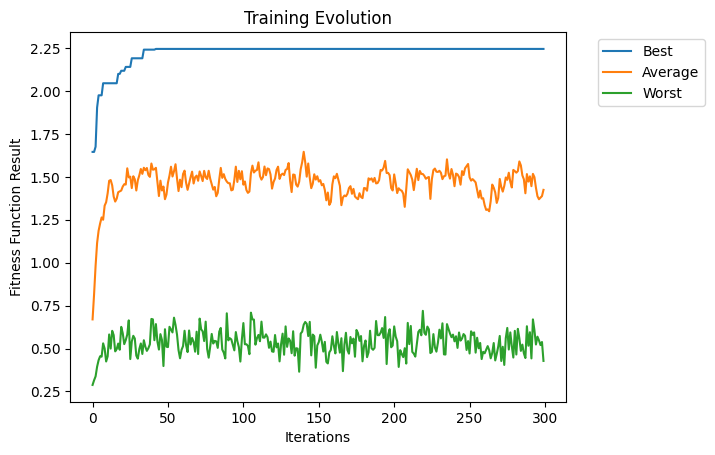

In [7]:
#Plotting in one graph

plt.plot(x, y_best)
plt.plot(x, y_average)
plt.plot(x, y_worst)
plt.title("Training Evolution")
plt.xlabel("Iterations")
plt.ylabel("Fitness Function Result")
plt.legend(['Best', 'Average', 'Worst'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()